# ISOM 2600 Topic 0: Data Preprocessing

### 1. Data Visualization
### 2. Handling Missing Values
### 3. Standardization
### 4. Transforming Features
### 5. Data slicing and selection

<font size=4>We need to import three libraries: Pandas, NumPy, Matplotlib to do data preprocessing.</font>

In [1]:
# Pandas
import pandas as pd

# NumPy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

## 1. Data Visualization

In [2]:
# Import data set 'stocks.csv'
# Change the default row to the column 'date'
stocks=pd.read_csv("data/stocks.csv", index_col=0)

In [3]:
# First five rows
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60


### 1a. Histogram

<font size=4>First, we learn drawing a histogram of the <font color=red>simple rate of return of hangseng</font>. You can get the simple rate by following code.</font>

In [4]:
# Compute the simple rate of return of hangseng
stocks["hangseng_return"]=stocks["hangseng"].pct_change()

# Display first five rows
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia,hangseng_return
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48,NaN
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48,0.005722
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12,0.009934
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06,-0.001720
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60,0.000723


/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Simple Rate of Daily Return of Hengseng Index')

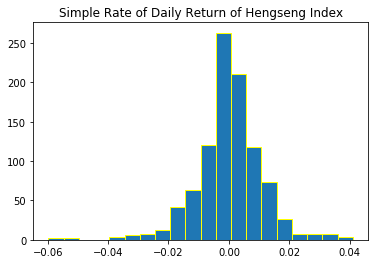

In [5]:
# Plot histogram
# no. of bins: 20
# edgecolor: yellow
plt.hist(stocks["hangseng_return"], bins=20, edgecolor='yellow')

# Title
plt.title("Simple Rate of Daily Return of Hengseng Index")

### 1b. Scatter Plot

<font size=4>We may have a scatter plot to see the pattern between the returns of S&P 500 Indexs and Hangseng Indexs.</font>

In [6]:
# Compute the simple rate of return of hangseng
stocks["sp500_return"]=stocks["sp500"].pct_change()

# Display first five rows
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia,hangseng_return,sp500_return
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48,NaN,NaN
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48,0.005722,0.000000
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12,0.009934,0.010048
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06,-0.001720,0.007346
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60,0.000723,0.003052


Text(0.5, 1.0, 'Scatter Plot between returns of S&P500 and Hangseng indices ')

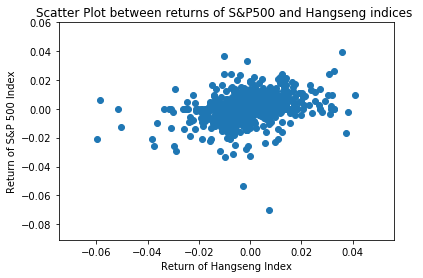

In [7]:
# Plot the scatter plot
# x-axis: Return of S&P 500 Index 
# y-axis: Return of Hangseng Index
plt.scatter(stocks["hangseng_return"], stocks["sp500_return"])

# ylabel
plt.ylabel("Return of S&P 500 Index")

# xlabel
plt.xlabel("Return of Hangseng Index")

# Title
plt.title("Scatter Plot between returns of S&P500 and Hangseng indices ")

### 1c. Scatter Matrix

<font size=4>We may have a overlook to the pattern between selected variables by scatter matrix. <br>This time, we want to investigate 'sp500_return','nikkei_return','hangseng_return'.</font>

In [8]:
# Compute the simple rate of return of nikkei
stocks["nikkei_return"]=stocks["nikkei"].pct_change()

# Display first five rows
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia,hangseng_return,sp500_return,nikkei_return
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48,NaN,NaN,NaN
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48,0.005722,0.000000,0.024848
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12,0.009934,0.010048,0.015356
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06,-0.001720,0.007346,0.000119
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60,0.000723,0.003052,-0.002620


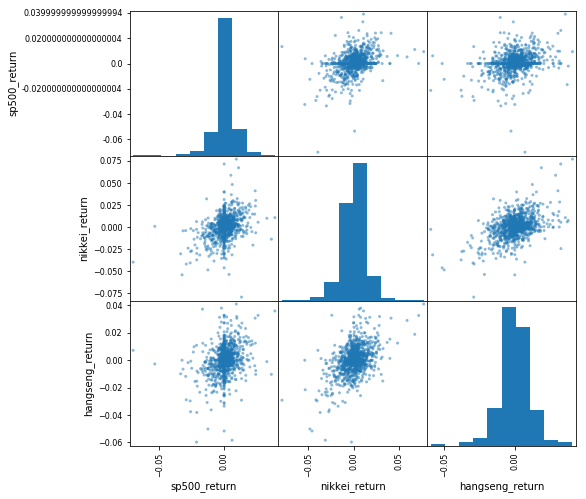

In [9]:
# Scatter matrix
# Variables: "sp500_return","nikkei_return","hangseng_return"
# Figure size: (8, 8)
pd.plotting.scatter_matrix(stocks[["sp500_return","nikkei_return","hangseng_return"]],
                           figsize=(8,8))
plt.show()

### 1d. Time Series Plot

<font size=4>Finally, we want to see the trend of the S&P Index across several years.</font>

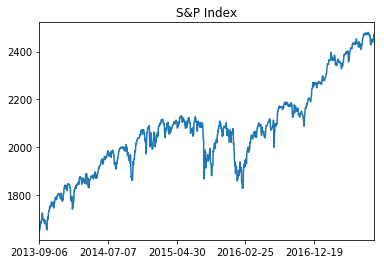

In [10]:
# Title
plt.title("S&P Index")

# Time series plot of S&P 500 index
stocks["sp500"].plot()

## 2. Handling Missing Values

### Fill missing values in time series 

In [11]:
# Assign column 'sp500' to a new DataFrame
sp500=stocks["sp500"]

In [12]:
# Display first five rows
sp500.head()

2013-09-06    1655.08
2013-09-09    1655.08
2013-09-10    1671.71
2013-09-11    1683.99
2013-09-12    1689.13
Name: sp500, dtype: float64

In [13]:
# Make two missing values
sp500.loc["2013-09-09":"2013-09-10"]=np.nan

In [14]:
# Display first five rows
sp500.head()

2013-09-06    1655.08
2013-09-09        NaN
2013-09-10        NaN
2013-09-11    1683.99
2013-09-12    1689.13
Name: sp500, dtype: float64

In [15]:
# Forward fill
sp500.fillna(method="ffill").head()

2013-09-06    1655.08
2013-09-09    1655.08
2013-09-10    1655.08
2013-09-11    1683.99
2013-09-12    1689.13
Name: sp500, dtype: float64

## 3. Standardization

### 3a. Max-min Standardization

$$
\frac{x-min}{max-min}
$$

In [16]:
# Return of S&P 500
stocks["sp500_return"]

2013-09-06         NaN
2013-09-09    0.000000
2013-09-10    0.010048
2013-09-11    0.007346
2013-09-12    0.003052
                ...   
2017-08-29    0.002161
2017-08-30    0.000843
2017-08-31    0.004615
2017-09-01    0.005721
2017-09-04    0.000000
Name: sp500_return, Length: 976, dtype: float64

In [17]:
# Drop the rows with NaN
stocks=stocks.dropna(axis=0)

stocks

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia,hangseng_return,sp500_return,nikkei_return
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06,-0.001720,0.007346,0.000119
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60,0.000723,0.003052,-0.002620
2013-09-13,14404.67,5214.7,9607.3168,8494.00,6583.80,22915.28,1683.42,15300.64,-0.001675,-0.003380,0.001209
2013-09-17,14311.67,5245.2,9704.4700,8613.00,6570.17,23180.52,1697.60,15494.78,0.011575,0.008423,-0.006456
2013-09-18,14505.36,5230.4,9738.9262,8596.95,6558.82,23117.45,1704.76,15529.73,-0.002721,0.004218,0.013534
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-29,19362.55,5733.6,11800.2193,12123.47,7337.43,27765.01,2444.24,21808.40,-0.003527,0.002161,-0.004491
2017-08-30,19506.54,5733.8,11791.8786,11945.88,7365.26,28094.61,2446.30,21865.37,0.011871,0.000843,0.007437
2017-08-31,19646.24,5776.3,11805.0710,12002.47,7430.62,27970.30,2457.59,21892.43,-0.004425,0.004615,0.007162
2017-09-01,19691.47,5786.1,11875.6930,12055.84,7438.50,27953.16,2471.65,21948.10,-0.000613,0.005721,0.002302


In [18]:
# Compute the Return of S&P 500 after max-min Standardization
stocks["max-min"]=(stocks["sp500_return"]-stocks["sp500_return"].min())/(stocks["sp500_return"].max()-stocks["sp500_return"].min())


In [19]:
# Max. of the Return of S&P 500
print("Max=",stocks["sp500_return"].max())

# Min. of the Return of S&P 500
print("Min=",stocks["sp500_return"].min())

Max= 0.03902828198455799
Min= -0.07000928413885932


In [20]:
# Values of "sp500_return","max-min"
stocks[["sp500_return","max-min"]]

,sp500_return,max-min
2013-09-11,0.007346,0.709435
2013-09-12,0.003052,0.670059
2013-09-13,-0.003380,0.611063
2013-09-17,0.008423,0.719317
2013-09-18,0.004218,0.680747
...,...,...
2017-08-29,0.002161,0.661882
2017-08-30,0.000843,0.649795
2017-08-31,0.004615,0.684392
2017-09-01,0.005721,0.694534


Text(0.5, 1.0, 'Histogream of standardized sp500 return with max-min method')

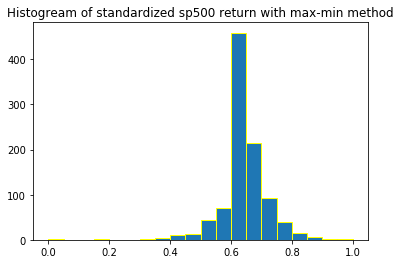

In [21]:
# Histogram
plt.hist(stocks["max-min"],bins=20,edgecolor='yellow')

# Title
plt.title("Histogream of standardized sp500 return with max-min method")

### 3b. Mean-standard deviation

$$
\frac{x-mean}{std}
$$

In [22]:
# Compute the Return of S&P 500 after Mean-standard deviation Standardization
stocks["mean-std"]=(stocks["sp500_return"]-stocks["sp500_return"].mean())/(stocks["sp500_return"].std())

# Values of "sp500_return","mean-std"
stocks[["sp500_return","mean-std"]]

,sp500_return,mean-std
2013-09-11,0.007346,0.844070
2013-09-12,0.003052,0.319621
2013-09-13,-0.003380,-0.466133
2013-09-17,0.008423,0.975693
2013-09-18,0.004218,0.461980
...,...,...
2017-08-29,0.002161,0.210721
2017-08-30,0.000843,0.049734
2017-08-31,0.004615,0.510524
2017-09-01,0.005721,0.645611


Text(0.5, 1.0, 'Histogream of standardized sp500 return with mean-std method')

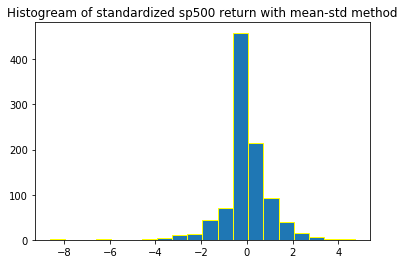

In [23]:
# Histogram
# no. of bins: 20
# Edgecolor: yellow
plt.hist(stocks["mean-std"],bins=20,edgecolor='yellow')

# Title
plt.title("Histogream of standardized sp500 return with mean-std method")

## 4. Transforming Features

###  Dummification

<font size=4>You may use the <font color=red>list comprehension</font> to introduce dummy variables.</font>

In [24]:
# 1: The return of SP500 is positive
# 0: The return of SP500 is negative
stocks["sp500_return_dummy"]=[1 if x >0 else 0 for x in stocks["sp500_return"]]

In [25]:
# Values of "sp500_return","sp500_return_dummy"
stocks[["sp500_return","sp500_return_dummy"]]

,sp500_return,sp500_return_dummy
2013-09-11,0.007346,1
2013-09-12,0.003052,1
2013-09-13,-0.003380,0
2013-09-17,0.008423,1
2013-09-18,0.004218,1
...,...,...
2017-08-29,0.002161,1
2017-08-30,0.000843,1
2017-08-31,0.004615,1
2017-09-01,0.005721,1


In [26]:
# 1: The return of nikkei is positive
# 0: The return of nikkei is negative
stocks["nikkei_return_dummy"]=[1 if x >0 else 0 for x in stocks["nikkei_return"]]

In [27]:
# Product of "nikkei_return_dummy" and "sp500_return_dummy"
stocks["product"]=stocks["nikkei_return_dummy"]*stocks["sp500_return_dummy"]

In [28]:
# Values of "nikkei_return_dummy","sp500_return_dummy","product"
stocks[["nikkei_return_dummy","sp500_return_dummy","product"]]

,nikkei_return_dummy,sp500_return_dummy,product
2013-09-11,1,1,1
2013-09-12,0,1,0
2013-09-13,1,0,0
2013-09-17,0,1,0
2013-09-18,1,1,1
...,...,...,...
2017-08-29,0,1,0
2017-08-30,1,1,1
2017-08-31,1,1,1
2017-09-01,1,1,1


In [29]:
# Compute the square of return of nikkei
stocks["nikkei_return_square"]=stocks["nikkei_return"]**2

In [30]:
# Values of "nikkei_return","nikkei_return_square"
stocks[["nikkei_return","nikkei_return_square"]]

,nikkei_return,nikkei_return_square
2013-09-11,0.000119,1.405592e-08
2013-09-12,-0.002620,6.866695e-06
2013-09-13,0.001209,1.462654e-06
2013-09-17,-0.006456,4.168303e-05
2013-09-18,0.013534,1.831613e-04
...,...,...
2017-08-29,-0.004491,2.016931e-05
2017-08-30,0.007437,5.530184e-05
2017-08-31,0.007162,5.128996e-05
2017-09-01,0.002302,5.300225e-06


## 5. Data slicing and selection

### 5a. Split into Training and Testing set

<font size=4>We will split the first 80% data as training set and the remaining 20% as test set.</font>

In [31]:
# Shape of the DataFrame 'stocks'
stocks.shape

(973, 17)

In [32]:
# 80% as training set
train_size=int(973*0.8)

In [33]:
# 20% as testing set
test_size=973-train_size

In [34]:
# Training set
train=stocks.iloc[:train_size,:]

In [35]:
# Testing set
test=stocks.iloc[train_size:,:]

In [36]:
# "sp500_return","nikkei_return","hangseng_return" of Training set
train[["sp500_return","nikkei_return","hangseng_return"]]

,sp500_return,nikkei_return,hangseng_return
2013-09-11,0.007346,0.000119,-0.001720
2013-09-12,0.003052,-0.002620,0.000723
2013-09-13,-0.003380,0.001209,-0.001675
2013-09-17,0.008423,-0.006456,0.011575
2013-09-18,0.004218,0.013534,-0.002721
...,...,...,...
2016-11-14,0.000000,0.017142,-0.013709
2016-11-15,-0.001513,-0.000253,0.004576
2016-11-16,0.007481,0.010984,-0.001943
2016-11-17,-0.001582,0.000024,-0.000792


In [37]:
# "sp500_return","nikkei_return","hangseng_return" of test set
test[["sp500_return","nikkei_return","hangseng_return"]]

,sp500_return,nikkei_return,hangseng_return
2016-11-21,0.000000,0.007715,0.000607
2016-11-22,0.005057,0.003144,0.014326
2016-11-24,0.002975,0.009386,-0.003068
2016-11-25,0.000000,0.002608,0.005085
2016-11-28,0.000000,-0.001324,0.004714
...,...,...,...
2017-08-29,0.002161,-0.004491,-0.003527
2017-08-30,0.000843,0.007437,0.011871
2017-08-31,0.004615,0.007162,-0.004425
2017-09-01,0.005721,0.002302,-0.000613


### 5b. Select Rows

In [38]:
# Select the rows from "2015-01-01" to "2015-12-31"
# Select the columns "sp500_return","nikkei_return","hangseng_return"
stocks.loc["2015-01-01":"2015-12-31",["sp500_return","nikkei_return","hangseng_return"] ]

,sp500_return,nikkei_return,hangseng_return
2015-01-05,0.000000,-0.002410,0.009371
2015-01-06,-0.033479,-0.030187,-0.009945
2015-01-07,-0.008893,0.000127,0.008339
2015-01-08,0.011630,0.016687,0.006514
2015-01-09,0.017888,0.001784,0.003542
...,...,...,...
2015-12-24,0.021344,-0.005136,0.014114
2015-12-25,-0.001599,-0.001098,0.000000
2015-12-28,0.000000,0.005556,-0.009870
2015-12-29,-0.002179,0.005769,0.003650


### 5c. Select with Conditions

In [39]:
# Select the row with positive return of SP500
# Select the columns "sp500_return","nikkei_return","hangseng_return"
stocks[stocks["sp500_return"]>0][["sp500_return","nikkei_return","hangseng_return"] ]

,sp500_return,nikkei_return,hangseng_return
2013-09-11,0.007346,0.000119,-0.001720
2013-09-12,0.003052,-0.002620,0.000723
2013-09-17,0.008423,-0.006456,0.011575
2013-09-18,0.004218,0.013534,-0.002721
2013-09-19,0.012178,0.017981,0.016657
...,...,...,...
2017-08-23,0.009941,0.002621,0.000000
2017-08-29,0.002161,-0.004491,-0.003527
2017-08-30,0.000843,0.007437,0.011871
2017-08-31,0.004615,0.007162,-0.004425
